In [21]:
'''
CNNs, like neural networks, are made up of neurons with learnable weights and biases. 
Each neuron receives several inputs, takes a weighted sum over them, pass it through an activation function and responds with an output.
The whole network has a loss function and all the tips and tricks that we developed for neural networks still apply on CNNs.

A convolution is an operation that changes a function into something else. 
We do convolutions so that we can transform the original function into a form to get more information.

'''

'\nCNNs, like neural networks, are made up of neurons with learnable weights and biases. \nEach neuron receives several inputs, takes a weighted sum over them, pass it through an activation function and responds with an output.\nThe whole network has a loss function and all the tips and tricks that we developed for neural networks still apply on CNNs.\n\nA convolution is an operation that changes a function into something else. \nWe do convolutions so that we can transform the original function into a form to get more information.\n\n'

In [22]:
# importing all the required modules

import numpy as np # numpy for working with images as 3D arrays
import keras # open-source neural network library
from keras import backend as k
from keras.datasets import mnist # importing the mnist datatset
from keras.models import Model # import the Model function for training and testing the model

# A Dense layer feeds all outputs from the previous layer to all its neurons, each neuron providing one output to the next layer.

from keras.layers import Dense, Input

# Pooling helps the layer generalize because it effectively combines several values into a single one, this decreases the chance of overfitting
# Dropout layer initializes a set of inputs to zero, to reduce Overfitting.

from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten 
 

In [23]:
# loading the datasets into 60000 train images and 10000 test images
# x and y are input and output arrays

(x_train, y_train), (x_test, y_test) = mnist.load_data() 

In [24]:
# to find dimensions of 3D x_train and x_test

print(np.shape(x_train))
print(np.shape(x_test))

(60000, 28, 28)
(10000, 28, 28)


In [25]:
print(np.shape(x_train[0]))

(28, 28)


In [26]:
# we initialize the pixel values of each input image, and then we reshape the training array for the same

image_rows, image_cols=28, 28

if k.image_data_format() == 'channels_first': 

  # the number of training data inputs is 60000, which is returned by x_train.shape[0]
  x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols) 

  # the number of training data inputs is 10000, which is returned by x_train.shape[0]
  x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols) 

  # inpx contains dimensions of the arrays
  inpx = (1, image_rows, image_cols) 

else: 

  x_train = x_train.reshape(x_train.shape[0], image_rows, image_cols, 1) 
  
  x_test = x_test.reshape(x_test.shape[0], image_rows, image_cols, 1) 
  
  inpx = (image_rows, image_cols, 1) 

# we need to convert each numerical value to the closest float value, such that large terms are reduced to smaller terms

x_train = x_train.astype('float32') 
x_test = x_test.astype('float32') 

# to normalize all the values 
x_train /= 255
x_test /= 255


In [27]:
from keras.utils import np_utils

In [28]:
y_train = keras.utils.np_utils.to_categorical(y_train) 
y_test = keras.utils.np_utils.to_categorical(y_test) 

In [29]:
inpx = Input(shape=inpx) 
layer1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inpx) 
layer2 = Conv2D(64, (3, 3), activation='relu')(layer1) 
layer3 = MaxPooling2D(pool_size=(3, 3))(layer2) 
layer4 = Dropout(0.5)(layer3) 
layer5 = Flatten()(layer4) 
layer6 = Dense(250, activation='sigmoid')(layer5) 
layer7 = Dense(10, activation='softmax')(layer6) 

In [30]:
import tensorflow as tf

In [31]:
# calling the Model function in keras backend to assemble all layers of the model

model = Model([inpx], layer7)

# defining the necessary optimizer, loss function, for receiving the accuracy and loss results

model.compile(optimizer=tf.keras.optimizers.Adam(), 
			loss=keras.losses.categorical_crossentropy, 
			metrics=['accuracy']) 

# dividing the model into 8 epochs and giving each epoch a batch size of 500 elements

model.fit(x_train, y_train, epochs=8, batch_size=500) 

Epoch 1/8
120/120 [==============================] - 44s 367ms/step - loss: 0.4955 - accuracy: 0.8585
Epoch 2/8
120/120 [==============================] - 45s 373ms/step - loss: 0.1203 - accuracy: 0.9668
Epoch 3/8
120/120 [==============================] - 45s 377ms/step - loss: 0.0771 - accuracy: 0.9785
Epoch 4/8
120/120 [==============================] - 45s 378ms/step - loss: 0.0608 - accuracy: 0.9825
Epoch 5/8
120/120 [==============================] - 45s 379ms/step - loss: 0.0491 - accuracy: 0.9862
Epoch 6/8
120/120 [==============================] - 46s 385ms/step - loss: 0.0407 - accuracy: 0.9886
Epoch 7/8
120/120 [==============================] - 46s 380ms/step - loss: 0.0351 - accuracy: 0.9901
Epoch 8/8
120/120 [==============================] - 46s 382ms/step - loss: 0.0333 - accuracy: 0.9907


In [32]:
# to show summary of model

model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 64)          0         
                                                                 
 flatten_1 (Flatten)         (None, 4096)              0         
                                                           

(28, 28, 1)


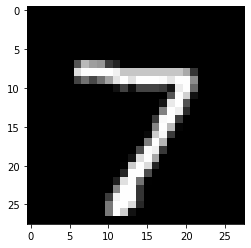

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [35]:
# to show the sample working of model, by using matplotlib to plot the number and its corresponding output.
import matplotlib.pyplot as plt
print(np.shape(x_train[0]))

inp=x_test[0]
outp=y_test[0]

inp2=inp.reshape(28,28)

plt.imshow(inp2, cmap='gray')
plt.show()

print(outp)